# Analysis

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("final_dataset.csv")
df.head(5)

,id,nome,ano_registo,type,n_reg,lat,lon,score_global,score_location,score_price/quality
0,1,metro apartment,2016.0,Apartamento,35375/AL,41.152554,-8.610274,6.9,8.4,6.2
1,2,be happy flat,2016.0,Apartamento,23120/AL,41.154861,-8.610286,9.2,9.3,9.0
2,3,camões apartment,2016.0,Apartamento,28842/AL,41.155397,-8.610221,9.4,9.1,9.6
3,9,estudio 312,2016.0,Apartamento,35922/AL,41.158680,-8.597245,NaN,NaN,NaN
4,13,the nature mezzanine,2016.0,Apartamento,30839/AL,41.149781,-8.601978,9.5,9.1,9.2


# Clustering

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
df_cl = df[["ano_registo", "lat", "lon", "score_global", "score_location", "score_price/quality"]]
df_cl.dropna(inplace=True)
df_cl.head(5)

C:\environments\hackacity\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ano_registo,lat,lon,score_global,score_location,score_price/quality
0,2016.0,41.152554,-8.610274,6.9,8.4,6.2
1,2016.0,41.154861,-8.610286,9.2,9.3,9.0
2,2016.0,41.155397,-8.610221,9.4,9.1,9.6
4,2016.0,41.149781,-8.601978,9.5,9.1,9.2
5,2016.0,41.153079,-8.602565,9.4,8.6,9.4


In [7]:
kmeans = KMeans(n_clusters=10, random_state=0, algorithm="full").fit(df_cl)

In [8]:
print(kmeans.labels_)

[5 7 7 ... 8 8 9]


In [9]:
centroids = kmeans.cluster_centers_
print(len(centroids))
print(centroids)

10
[[ 2.01726667e+03  4.11481418e+01 -8.61203319e+00  8.49952381e+00
   9.15571429e+00  8.16047619e+00]
 [ 2.01694231e+03  4.11496010e+01 -8.61326251e+00 -1.00000000e+00
   9.08076923e+00  8.80769231e+00]
 [ 2.01454857e+03  4.11493014e+01 -8.61397140e+00  9.07600000e+00
   9.32114286e+00  8.85600000e+00]
 [ 2.01705085e+03  4.11586451e+01 -8.60900004e+00  8.62881356e+00
   8.00734463e+00  8.66101695e+00]
 [ 2.01102632e+03  4.11490473e+01 -8.61237337e+00  8.15000000e+00
   8.74736842e+00  8.04473684e+00]
 [ 2.01692000e+03  4.11519752e+01 -8.60913020e+00  7.14000000e+00
   7.95866667e+00  6.98933333e+00]
 [ 2.01400000e+03  4.11510902e+01 -8.61155274e+00 -1.00000000e+00
   9.08333333e+00  8.70555556e+00]
 [ 2.01600000e+03  4.11476724e+01 -8.61113497e+00  9.19030837e+00
   9.43392070e+00  8.96960352e+00]
 [ 2.01800000e+03  4.11504006e+01 -8.60963571e+00  9.38361582e+00
   9.37966102e+00  9.22033898e+00]
 [ 2.01700000e+03  4.11495979e+01 -8.61098340e+00  9.36944444e+00
   9.46287879e+00  9.1

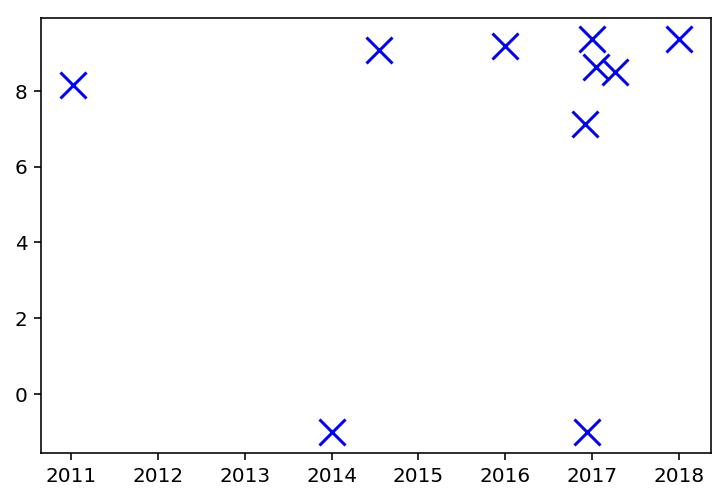

In [10]:
plt.scatter(centroids[:, 0], centroids[:, 3], marker='x', s=169, linewidths=3, color='b', zorder=10)
plt.show()

ideal clusters =  2 with a gain of 1769.4162797573954


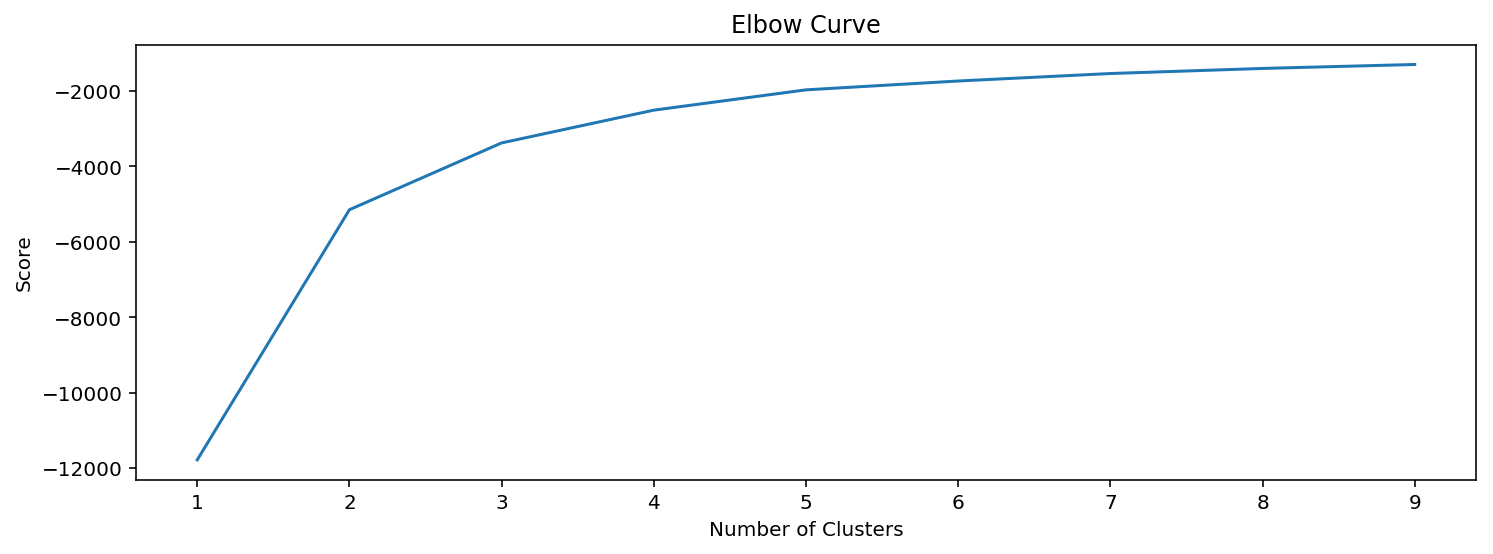

In [11]:
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i, random_state=0) for i in Nc]
score = [kmeans[i].fit(df_cl).score(df_cl) for i in range(len(kmeans))]

# calculate best k
var, start = [], score[0]
for s in score[1:]: var.append(abs(start-s)); start = s
var=var[1:]
print("ideal clusters = ", 2 + var.index(max(var)), "with a gain of", max(var))

# plot curve
plt.figure(figsize=(12,4))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
# plt.show()
plt.savefig("pics/elbow.png", bbox_inches='tight')

# Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [43]:
df_r = df[["ano_registo", "lat", "lon", "score_location"]]
# df_r.dropna(inplace=True)
df_r.head(5)

,ano_registo,lat,lon,score_location
0,2016.0,41.152554,-8.610274,8.4
1,2016.0,41.154861,-8.610286,9.3
2,2016.0,41.155397,-8.610221,9.1
3,2016.0,41.158680,-8.597245,NaN
4,2016.0,41.149781,-8.601978,9.1


In [44]:
df_r = df_r.dropna()
df_x, df_y = df_r.drop("score_location", axis=1), df_r['score_location']

,ano_registo,lat,lon,score_global,score_location,score_price/quality
0,2016.0,41.152554,-8.610274,6.9,8.4,6.2
1,2016.0,41.154861,-8.610286,9.2,9.3,9.0
2,2016.0,41.155397,-8.610221,9.4,9.1,9.6
4,2016.0,41.149781,-8.601978,9.5,9.1,9.2
5,2016.0,41.153079,-8.602565,9.4,8.6,9.4
6,2016.0,41.162070,-8.644394,7.2,7.5,7.4
7,2016.0,41.148403,-8.624155,9.3,8.9,9.1
8,2015.0,41.152045,-8.604210,9.4,9.2,9.5
9,2015.0,41.151262,-8.606319,9.1,9.3,8.9
10,2015.0,41.152725,-8.605424,8.8,9.4,8.6


In [45]:
reg = LinearRegression().fit(df_x, df_y)


In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(reg, 3)
rfe = rfe.fit(df_x, df_y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
df_x.columns

[ True  True  True]
[1 1 1]


Index(['ano_registo', 'lat', 'lon'], dtype='object')

In [49]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(df_x, df_y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.04312234 0.57979642 0.37708124]


In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
!conda install pydotplus

In [ ]:
!pip install pydotplus